In [1]:
import pandas as pd
import anndata as ad
from anndata import AnnData
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import rectanglepy as rectangle
from rectanglepy import ConsensusResult
from rectanglepy.pp import RectangleSignatureResult
from scipy.stats import zscore
from custom_annotation_functions import custom_anno1, custom_anno2, custom_anno3, custom_anno4

In [2]:
print('Load single cell data')
sc_dir = "/home/evos/Data/CRC/AllCells_RAW.h5ad"
sc_data = ad.read_h5ad(sc_dir)
sc_expression_matrix = sc_data.X
cell_metadata = sc_data.obs
gene_metadata = sc_data.var

print('Add custom annotations')
#Add custom annotations
cell_metadata['custom_annotation1'] = cell_metadata['author_ClusterMidway']
cell_metadata['custom_annotation1'] = cell_metadata['custom_annotation1'].apply(custom_anno1)

cell_metadata['custom_annotation2'] = cell_metadata['author_ClusterMidway']
cell_metadata['custom_annotation2'] = cell_metadata['custom_annotation2'].apply(custom_anno2)

cell_metadata['custom_annotation3'] = cell_metadata['author_ClusterMidway']
cell_metadata['custom_annotation3'] = cell_metadata['custom_annotation3'].apply(custom_anno3)

cell_metadata['custom_annotation4'] = cell_metadata['author_ClusterMidway']
cell_metadata['custom_annotation4'] = cell_metadata['custom_annotation4'].apply(custom_anno4)

sc_data.obs['custom_annotation1'] = cell_metadata['custom_annotation1']
sc_data.obs['custom_annotation2'] = cell_metadata['custom_annotation2']
sc_data.obs['custom_annotation3'] = cell_metadata['custom_annotation3']
sc_data.obs['custom_annotation4'] = cell_metadata['custom_annotation4']


Load single cell data
Add custom annotations


In [3]:
import scanpy as sc
import matplotlib.pyplot as plt

# Preprocessing
sc.pp.normalize_total(sc_data, target_sum=1e4)  # Normalize per cell
sc.pp.log1p(sc_data)                            # Log-transform the data
sc.pp.highly_variable_genes(sc_data, min_mean=0.0125, max_mean=3, min_disp=0.5)  # Identify variable genes
sc_data = sc_data[:, sc_data.var['highly_variable']]  # Filter to only highly variable genes

# Run PCA
sc.pp.pca(sc_data, n_comps=50)

# Compute nearest neighbors
sc.pp.neighbors(sc_data, n_pcs=30)

# Run UMAP
sc.tl.umap(sc_data)


/home/evos/miniconda3/envs/thesis_rectangle/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
/home/evos/miniconda3/envs/thesis_rectangle/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


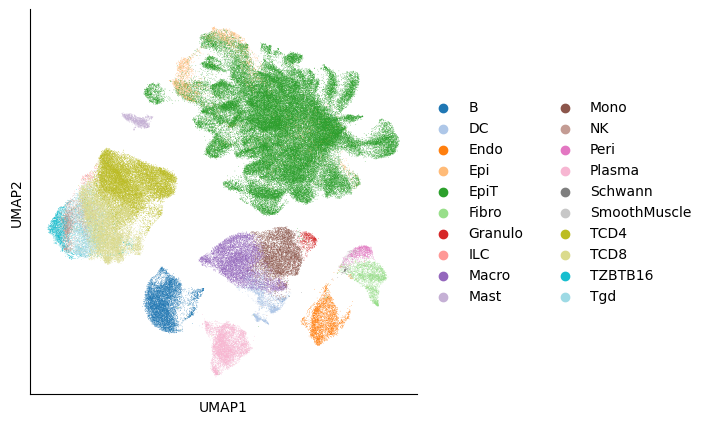

In [18]:
cell_type_column = 'author_ClusterMidway'  # Update to match your column name for cell types
sc.pl.umap(sc_data, color=cell_type_column, palette='tab20', title='', show=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#plt.tight_layout()
plt.gcf().set_size_inches(5, 5)
plt.savefig('intermediate.png', dpi=300, bbox_inches='tight')

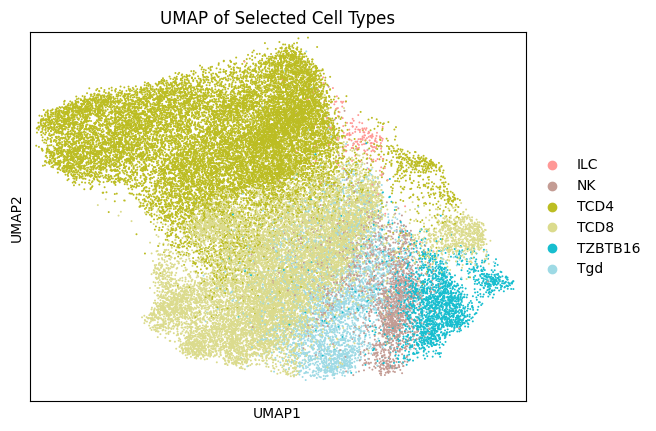

<Figure size 640x480 with 0 Axes>

In [99]:
desired_cell_types = ['TCD4','TCD8', 'Tgd', 'TCD8', 'TZBTB16', 'Tgd', 'NK', 'ILC']
filtered_sc_data = sc_data[sc_data.obs['author_ClusterMidway'].isin(desired_cell_types)]

#custom_colors = ['#FF6347', '#4682B4', '#32CD32']  # Example colors (adjust as needed)
#cmap = mcolors.ListedColormap(custom_colors)

sc.pl.umap(filtered_sc_data, color='author_ClusterMidway', size=8, alpha=1, title="UMAP of Selected Cell Types", show=False)
#plt.show() 

ax = plt.gca()

# Set the x and y axis limits
ax.set_xlim([-10, 0])  # Adjust these values based on your data
ax.set_ylim([-2, 9])  # Adjust these values based on your data

# Show the plot
plt.show()
plt.savefig('umap_zoomed.png') 


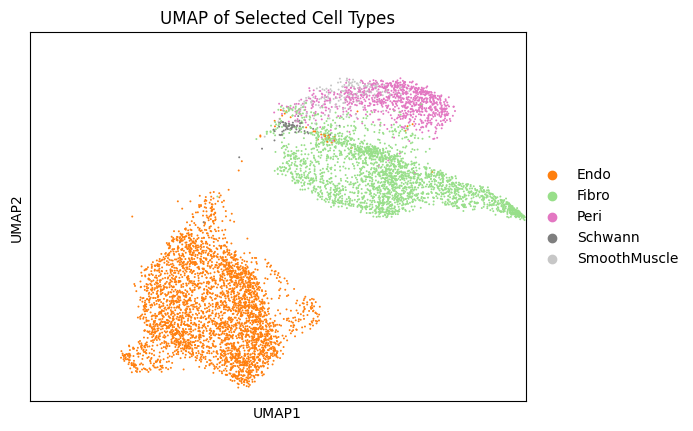

<Figure size 640x480 with 0 Axes>

In [118]:
desired_cell_types = ['Endo', 'Peri', 'SmoothMuscle', 'Fibro', 'Schwann']
filtered_sc_data = sc_data[sc_data.obs['author_ClusterMidway'].isin(desired_cell_types)]

#custom_colors = ['#FF6347', '#4682B4', '#32CD32']  # Example colors (adjust as needed)
#cmap = mcolors.ListedColormap(custom_colors)

sc.pl.umap(filtered_sc_data, color='author_ClusterMidway', size=8, alpha=1, title="UMAP of Selected Cell Types", show=False)
#plt.show() 

ax = plt.gca()

# Set the x and y axis limits
ax.set_xlim([8,16])  # Adjust these values based on your data
ax.set_ylim([-5,5])  # Adjust these values based on your data

# Show the plot
plt.show()
plt.savefig('umap_zoomed.png') 


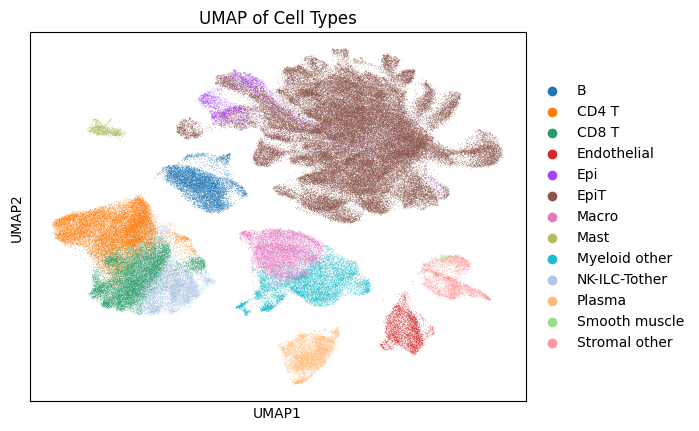

In [13]:
cell_type_column = 'custom_annotation4'  # Update to match your column name for cell types
sc.pl.umap(sc_data, color=cell_type_column, title="UMAP of Cell Types")
plt.show()